In [ ]:
!pip install --upgrade tensorflow


In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import shutil

# Set the path to your original dataset directory
main_dir = '/kaggle/input/finallllllll/The_Final_Dataset'

# Create a new directory for the augmented dataset
aug_dir = '/kaggle/working/augmented'
os.makedirs(aug_dir, exist_ok=True)

# List all class directories
class_dirs = [d for d in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, d))]

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Process each class
for class_dir in class_dirs:
    original_class_path = os.path.join(main_dir, class_dir)
    aug_class_path = os.path.join(aug_dir, class_dir)
    os.makedirs(aug_class_path, exist_ok=True)
    
    # List all image files
    image_files = [f for f in os.listdir(original_class_path) if f.lower().endswith(('.jpg', '.png'))]
    
    # Copy original images
    for img_file in image_files:
        shutil.copy(os.path.join(original_class_path, img_file), aug_class_path)
    
    # Calculate additional images needed
    N = len(image_files)
    M = 350 - N
    if M > 0:
        # Generate augmented images
        for i in range(M):
            img_file = np.random.choice(image_files)
            img_path = os.path.join(aug_class_path, img_file)
            
            # Determine file extension
            file_ext = os.path.splitext(img_file)[1].lower()
            
            # Load and augment image
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            augmented = next(datagen.flow(x, batch_size=1))
            aug_img = array_to_img(augmented[0])
            aug_img.save(os.path.join(aug_class_path, f'aug_{i}{file_ext}'))

In [ ]:
!zip -r /kaggle/working/augmented.zip /kaggle/working/augmented


In [2]:
import os

aug_dir = '/kaggle/working/augmented'
class_dirs = [d for d in os.listdir(aug_dir) if os.path.isdir(os.path.join(aug_dir, d))]

for class_dir in class_dirs:
    class_path = os.path.join(aug_dir, class_dir)
    num_images = len([f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')])
    print(f"Class {class_dir} has {num_images} images.")

Class Black_Bishop has 350 images.
Class Black_King has 350 images.
Class White_Queen has 350 images.
Class White_Bishop has 350 images.
Class Black_Rook has 350 images.
Class White_Knight has 350 images.
Class White_King has 350 images.
Class Black_Queen has 350 images.
Class Black_Knight has 350 images.
Class Blank has 350 images.
Class White_Rook has 350 images.
Class Black_Pawn has 350 images.
Class White_Pawn has 350 images.


In [3]:
import os
import random
from sklearn.model_selection import train_test_split
import shutil

# Directories
augmented_dir = '/kaggle/working/augmented'
data_dir = '/kaggle/working/data'
os.makedirs(data_dir, exist_ok=True)

# Create subdirectories for train, val, and test splits for each class
subdirs = ['train', 'val', 'test']
for subdir in subdirs:
    subdir_path = os.path.join(data_dir, subdir)
    os.makedirs(subdir_path, exist_ok=True)
    for class_dir in os.listdir(augmented_dir):
        class_subdir = os.path.join(subdir_path, class_dir)
        os.makedirs(class_subdir, exist_ok=True)

# Define split ratios
train_ratio = 0.7   # 70% for training
val_ratio = 0.15    # 15% for validation
test_ratio = 0.15   # 15% for testing

# Process each class folder in the augmented directory
for class_name in os.listdir(augmented_dir):
    class_path = os.path.join(augmented_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    # List all image files in the class directory
    files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    # Shuffle the files for randomness
    random.seed(42)
    random.shuffle(files)
    
    # First, split off the training files
    train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
    # Then split the remaining files evenly into validation and test sets
    val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)
    
    # Copy files into the train directory
    for f in train_files:
        src = os.path.join(class_path, f)
        dst = os.path.join(data_dir, 'train', class_name, f)
        shutil.copy(src, dst)
    
    # Copy files into the validation directory
    for f in val_files:
        src = os.path.join(class_path, f)
        dst = os.path.join(data_dir, 'val', class_name, f)
        shutil.copy(src, dst)
    
    # Copy files into the test directory
    for f in test_files:
        src = os.path.join(class_path, f)
        dst = os.path.join(data_dir, 'test', class_name, f)
        shutil.copy(src, dst)

print("Data splitting complete.")


Data splitting complete.


Found 3172 images belonging to 13 classes.
Found 689 images belonging to 13 classes.

Training Fold 1/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.0831 - loss: 2.5202 - val_accuracy: 0.1543 - val_loss: 1.9559
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1545 - loss: 1.9969 - val_accuracy: 0.1433 - val_loss: 1.9601
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1624 - loss: 1.9635 - val_accuracy: 0.1575 - val_loss: 1.9726
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1990 - loss: 1.8901 - val_accuracy: 0.2063 - val_loss: 1.8341
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2268 - loss: 1.8320 - val_accuracy: 0.2378 - val_loss: 1.7118
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2394 - loss: 1.7572 - val_accuracy: 0.2551 - val_loss: 1.6675
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2518 - loss: 1.7432 - val_accuracy: 0.2016 - val_loss: 1.9039
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2279 - loss: 1.7773 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Fold 1 Test Accuracy: 69.67%
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


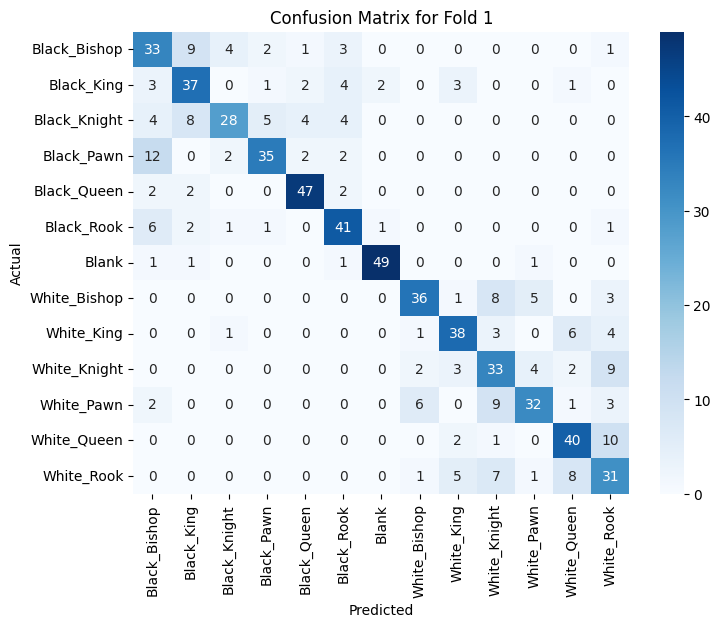


Training Fold 2/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.1003 - loss: 2.4856 - val_accuracy: 0.1921 - val_loss: 2.0538
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1615 - loss: 1.9981 - val_accuracy: 0.2000 - val_loss: 1.9118
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2430 - loss: 1.8382 - val_accuracy: 0.2110 - val_loss: 1.8979
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2328 - loss: 1.8092 - val_accuracy: 0.2331 - val_loss: 1.7385
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2433 - loss: 1.7653 - val_accuracy: 0.2598 - val_loss: 1.7491
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2584 - loss: 1.7084 - val_accuracy: 0.2630 - val_loss: 1.7141
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2518 - loss: 1.7327 - val_accuracy: 0.2756 - val_loss: 1.6750
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2434 - loss: 1.7486 - val_accuracy: 0.

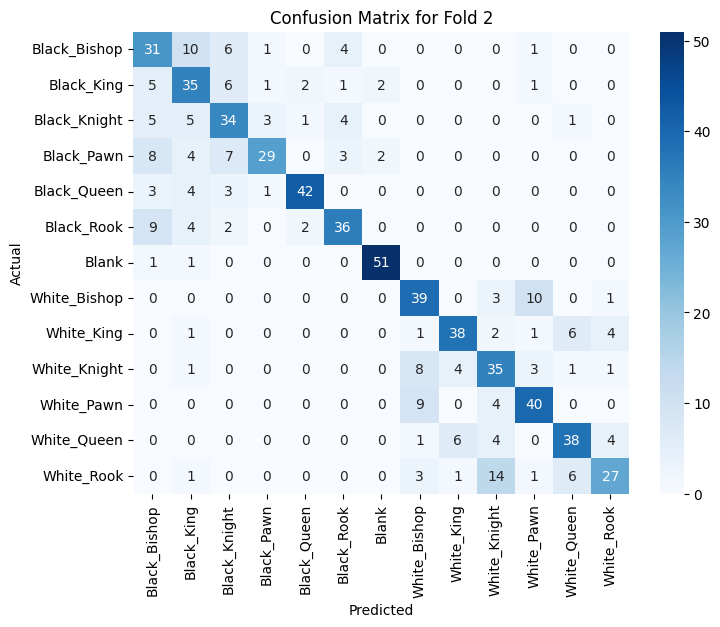


Training Fold 3/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.0735 - loss: 2.5650 - val_accuracy: 0.1435 - val_loss: 2.3312
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1664 - loss: 2.0976 - val_accuracy: 0.2445 - val_loss: 1.8279
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2127 - loss: 1.8579 - val_accuracy: 0.3013 - val_loss: 1.7155
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2586 - loss: 1.7832 - val_accuracy: 0.3281 - val_loss: 1.6246
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2830 - loss: 1.7083 - val_accuracy: 0.3202 - val_loss: 1.6231
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3077 - loss: 1.6387 - val_accuracy: 0.3407 - val_loss: 1.5576
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3473 - loss: 1.5474 - val_accuracy: 0.3596 - val_loss: 1.5240
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3483 - loss: 1.5340 - val_accuracy: 0.

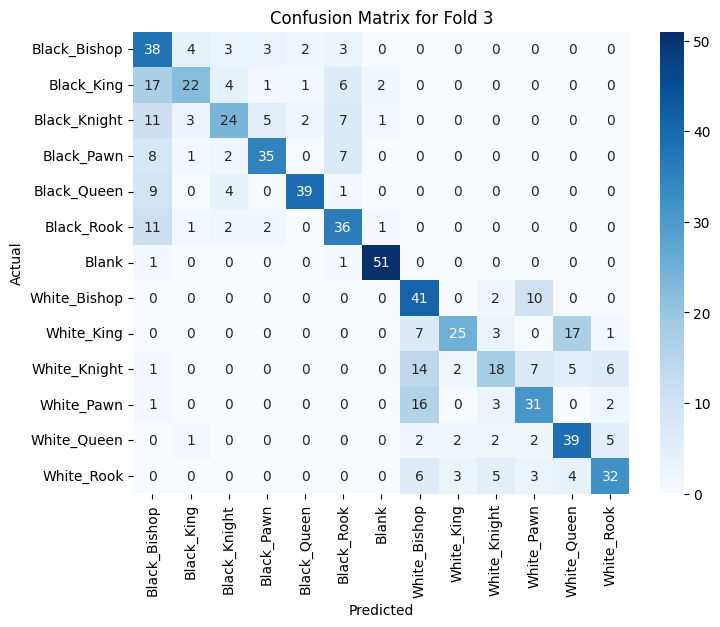


Training Fold 4/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.0975 - loss: 2.4844 - val_accuracy: 0.1167 - val_loss: 2.3089
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1561 - loss: 2.0153 - val_accuracy: 0.1719 - val_loss: 1.9418
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1612 - loss: 1.9504 - val_accuracy: 0.2066 - val_loss: 2.1073
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2277 - loss: 1.8443 - val_accuracy: 0.2476 - val_loss: 1.7814
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2214 - loss: 1.7769 - val_accuracy: 0.2382 - val_loss: 1.7870
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2465 - loss: 1.7372 - val_accuracy: 0.2224 - val_loss: 1.8592
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2516 - loss: 1.7668 - val_accuracy: 0.3076 - val_loss: 1.6863
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3229 - loss: 1.6066 - val_accuracy: 0.

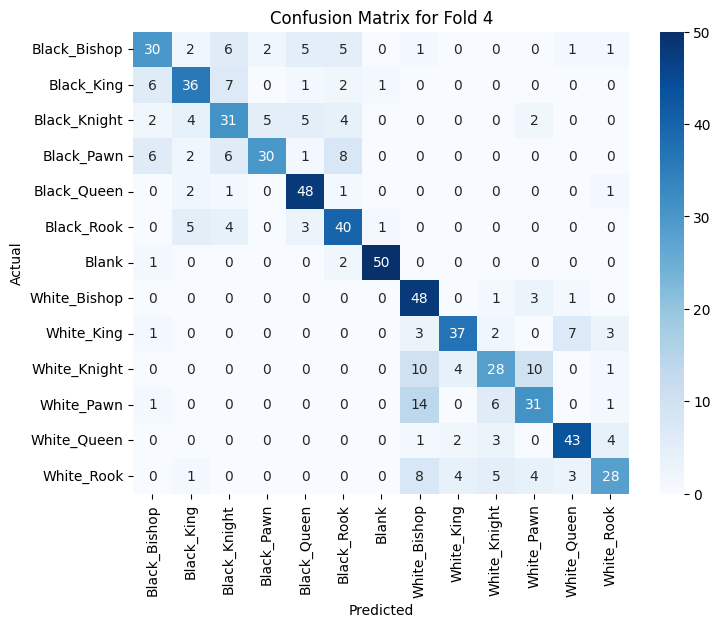


Training Fold 5/5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.0727 - loss: 2.5563 - val_accuracy: 0.1593 - val_loss: 1.9914
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1508 - loss: 1.9982 - val_accuracy: 0.1688 - val_loss: 1.9350
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1705 - loss: 2.0234 - val_accuracy: 0.2366 - val_loss: 1.8298
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2363 - loss: 1.8230 - val_accuracy: 0.2382 - val_loss: 1.7671
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2342 - loss: 1.7584 - val_accuracy: 0.2666 - val_loss: 1.7100
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2263 - loss: 1.7466 - val_accuracy: 0.2303 - val_loss: 1.7951
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2493 - loss: 1.7101 - val_accuracy: 0.2618 - val_loss: 1.6873
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2815 - loss: 1.6851 - val_accuracy: 0.

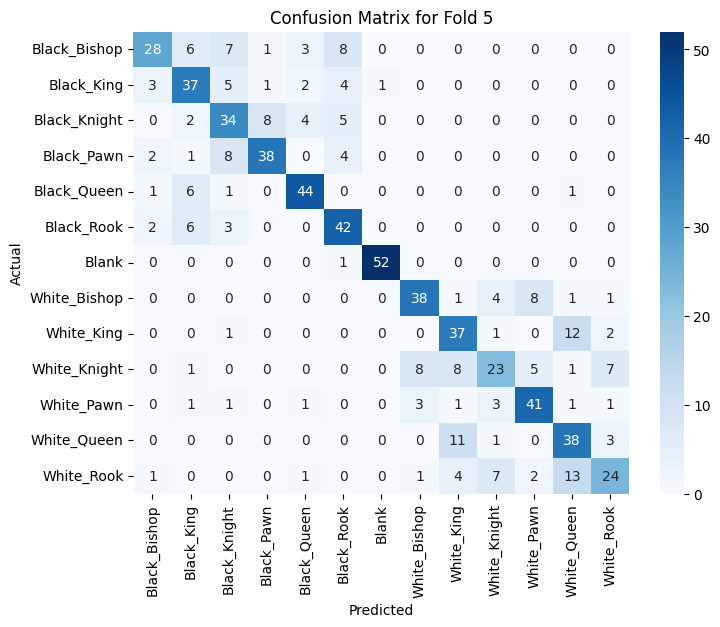


Mean Test Accuracy over 5 folds: 67.98%


In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Directories (update if needed)
data_dir = '/kaggle/working/data'
train_dir = os.path.join(data_dir, 'train')
test_dir  = os.path.join(data_dir, 'test')

# Hyperparameters
batch_size = 32
img_height = 64   # Using 64x64 for small images
img_width  = 64
epochs     = 100  # 100 epochs per fold
num_folds  = 5

# Data generators: load images as RGB.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Load training data from train_dir for CV (use shuffle=False so order is consistent)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
input_shape = (img_height, img_width, 3)

# Convert training generator data to numpy arrays
X_train, y_train = [], []
for i in range(len(train_generator)):
    batch = next(train_generator)
    X_train.append(batch[0])
    y_train.append(batch[1])
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

# Get label indices for stratified splitting.
y_train_labels = np.argmax(y_train, axis=1)

# Load test data using test_generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)
y_test_true = test_generator.classes  # true labels for confusion matrix

# Define the AlexNet-inspired model (adapted for small images)
def create_model(input_shape, num_classes):
    model = Sequential([
        # Layer 1: Convolutional + Pooling
        Conv2D(96, (11, 11), strides=(4, 4), activation='relu',
               input_shape=input_shape, padding='valid'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        # Layer 2: Convolutional + Pooling
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        
        # Layer 3: Convolutional
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Layer 4: Convolutional
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Layer 5: Convolutional + Adjusted Pooling
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        
        # Fully Connected Layers
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
fold = 1
fold_test_accuracies = []

for train_idx, val_idx in skf.split(X_train, y_train_labels):
    print(f"\nTraining Fold {fold}/{num_folds}...")
    model = create_model(input_shape, num_classes)
    
    # Train on the current fold's training split and validate on its validation split.
    model.fit(X_train[train_idx], y_train[train_idx],
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(X_train[val_idx], y_train[val_idx]),
              verbose=1)
    
    # Evaluate the trained model on the fixed test set.
    test_loss, test_acc = model.evaluate(test_generator, verbose=0)
    print(f"Fold {fold} Test Accuracy: {test_acc*100:.2f}%")
    fold_test_accuracies.append(test_acc)
    
    # Predict on test set for confusion matrix.
    y_test_pred = np.argmax(model.predict(test_generator), axis=1)
    cm = confusion_matrix(y_test_true, y_test_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_generator.class_indices.keys(),
                yticklabels=train_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.show()
    
    # Save the model for this fold.
    model.save(f'model_fold_{fold}.h5')
    fold += 1

print(f"\nMean Test Accuracy over {num_folds} folds: {np.mean(fold_test_accuracies)*100:.2f}%")


In [11]:
!pip install inference_sdk
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient  # Ensure this is installed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 85.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.12
    Uninstalling aiohttp-3.11.12:
      Successfully uninstalled aiohttp-3.11.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
langchain 0.3.12 requires async-timeout<5.0.0,>=4.0.0; python_version < "3.11", but 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Cell [0, 0] Prediction: 2 -> n
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cell [0, 1] Prediction: 2 -> n
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cell [0, 2] Prediction: 6 -> 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cell [0, 3] Prediction: 1 -> k
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cell [0, 4] Prediction: 4 -> q
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cell [0, 5] Prediction: 6 -> 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cell [0, 6] Prediction: 0 -> b
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Cell [0, 7] Prediction: 3 -> p
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cell [1, 0] Prediction: 2 -> n
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cell [1, 1] Prediction: 3 -> p
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cell [1, 2] Prediction: 3 -> p
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cell [1, 3] Prediction: 6 -> 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cell [1, 4] Prediction: 3 -> p
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Cell [1, 5] Prediction: 6 -> 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

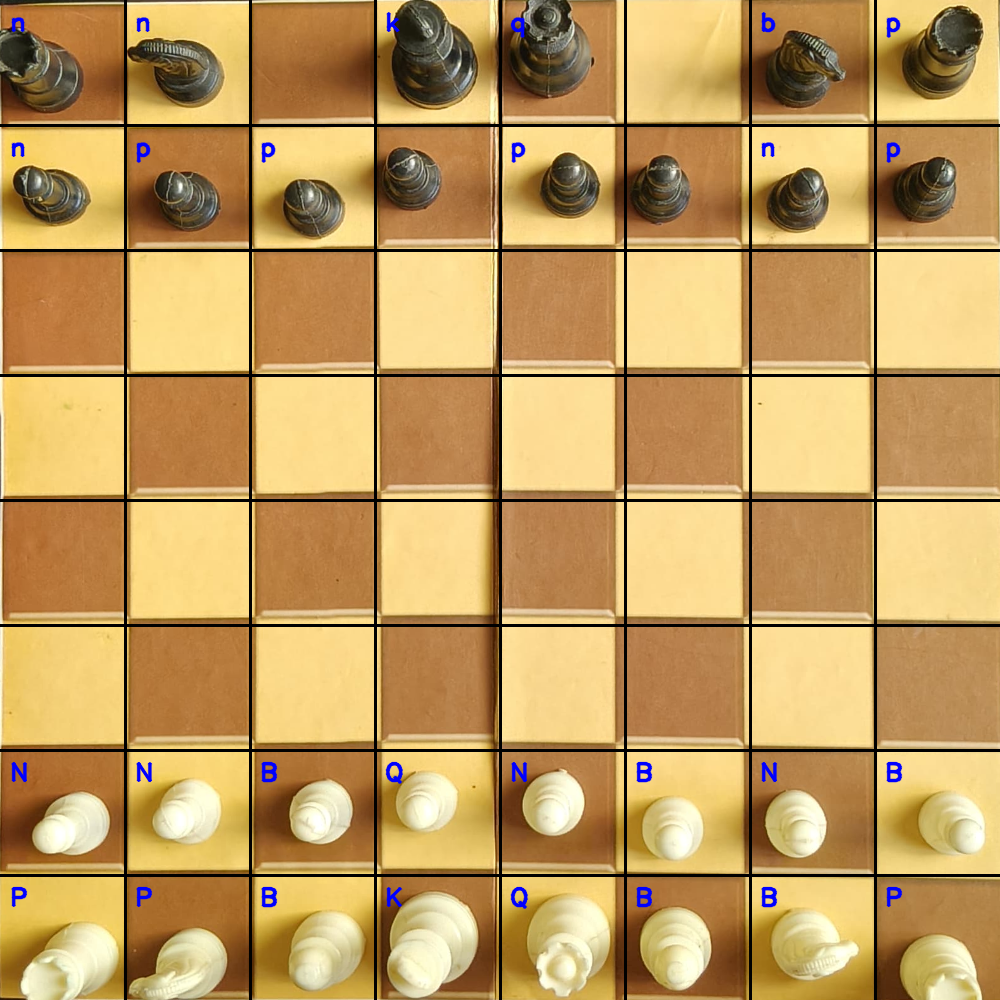

In [13]:
import cv2
import numpy as np
from inference_sdk import InferenceHTTPClient
from google.colab.patches import cv2_imshow
import tensorflow as tf

############################################
# 1. Chessboard Segmentation and Warping   #
############################################

# Initialize the inference client
CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com",
    api_key="hiXB6MTQOH0hlxROddmK"
)

# Load image
path_img = "/kaggle/input/testt-imges/WhatsApp Image 2025-03-19 at 16.13.30.jpeg"
image = cv2.imread(path_img)
if image is None:
    raise ValueError("Image not loaded correctly. Please check the image path.")

# Perform inference to get chessboard segmentation
result = CLIENT.infer(path_img, model_id="chessboard-segmentation/1")

# Extract chessboard corner points from segmentation output
points = np.array([(p["x"], p["y"]) for p in result["predictions"][0]["points"]], dtype=np.float32)

# Find the convex hull of the detected points
hull = cv2.convexHull(points).astype(np.int32)

# Function to order points: Top-left, Top-right, Bottom-right, Bottom-left
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)
    rect[0] = pts[np.argmin(s)]   # Top-left
    rect[2] = pts[np.argmax(s)]   # Bottom-right
    rect[1] = pts[np.argmin(diff)]  # Top-right
    rect[3] = pts[np.argmax(diff)]  # Bottom-left
    return rect

# Order the chessboard corners
ordered_corners = order_points(hull.reshape(-1, 2))
ordered_corners = np.array(ordered_corners, dtype=np.float32)

# Define destination points for warping (to a 1000x1000 chessboard image)
dst_points = np.array([[0, 0], [1000, 0], [1000, 1000], [0, 1000]], dtype=np.float32)

# Compute perspective transformation matrix and warp the image
matrix = cv2.getPerspectiveTransform(ordered_corners, dst_points)
warped_original = cv2.warpPerspective(image, matrix, (1000, 1000))

# Create a copy for drawing grid and overlaying predictions
warped_with_grid = warped_original.copy()

############################################
# 2. Draw Chessboard Grid                  #
############################################

rows, cols = 8, 8
cell_size = warped_original.shape[1] // rows  # Each cell's size

# Draw grid lines on the warped image for display
for i in range(1, rows):
    cv2.line(warped_with_grid, (0, i * cell_size), (1000, i * cell_size), (0, 0, 0), 2)  # Horizontal line
    cv2.line(warped_with_grid, (i * cell_size, 0), (i * cell_size, 1000), (0, 0, 0), 2)  # Vertical line

############################################
# 3. Load Classification Model             #
############################################

# Load your pre-trained model (ensure this model was trained on grayscale images resized to 200x200)
model = tf.keras.models.load_model('/kaggle/working/model_fold_1.h5')

############################################
# 4. Define Mapping and Prepare Predictions  #
############################################

# Mapping from predicted class index to FEN symbol.
# Adjust indices as per your training.
mapping = {
    0: 'b',   # Black_Bishop
    1: 'k',   # Black_King
    2: 'n',   # Black_Knight
    3: 'p',   # Black_Pawn
    4: 'q',   # Black_Queen
    5: 'r',   # Black_Rook
    6: '',    # Blank square
    7: 'B',   # White_Bishop
    8: 'K',   # White_King
    9: 'N',   # White_Knight
    10: 'P',  # White_Pawn
    11: 'Q',  # White_Queen
    12: 'R'   # White_Rook
}

# Prepare an 8x8 grid to store the FEN symbol for each cell.
predictions_grid = []

############################################
# 5. Process Each Cell and Predict         #
############################################

for i in range(rows):
    row_predictions = []
    for j in range(cols):
        # Calculate cell coordinates in the warped image
        x_start, y_start = j * cell_size, i * cell_size
        x_end, y_end = (j + 1) * cell_size, (i + 1) * cell_size
        
        # Extract the cell from the warped image
        cell = warped_original[y_start:y_end, x_start:x_end]
        
        # Resize cell to 200x200 pixels
        cell_resized = cv2.resize(cell, (200, 200))
        
        # Convert cell to grayscale (model expects 1 channel)
        cell_gray = cv2.cvtColor(cell_resized, cv2.COLOR_BGR2GRAY)
        
        # Normalize and reshape the cell for model prediction: shape (1, 200, 200, 1)
        cell_input = cell_gray.astype(np.float32) / 255.0
        cell_input = np.expand_dims(cell_input, axis=-1)  # (200,200,1)
        cell_input = np.expand_dims(cell_input, axis=0)     # (1,200,200,1)
        
        # Predict the class for this cell
        prediction = model.predict(cell_input)
        predicted_class = np.argmax(prediction, axis=1)[0]
        
        # Map the predicted class to its FEN symbol
        fen_symbol = mapping[predicted_class]
        row_predictions.append(fen_symbol)
        
        # Optionally, overlay the predicted FEN symbol on the grid image (for visualization)
        text_position = (x_start + 10, y_start + 30)
        cv2.putText(warped_with_grid, fen_symbol, text_position, cv2.FONT_HERSHEY_SIMPLEX, 
                    0.8, (255, 0, 0), 2, cv2.LINE_AA)
        
        # Print prediction to the console for debugging
        print(f"Cell [{i}, {j}] Prediction: {predicted_class} -> {fen_symbol}")
    predictions_grid.append(row_predictions)

############################################
# 6. Build the FEN String from Predictions   #
############################################

# Helper function to convert a row's predictions into FEN format.
def row_to_fen(row):
    fen_row = ""
    blank_count = 0
    for symbol in row:
        if symbol == "":  # blank square
            blank_count += 1
        else:
            if blank_count > 0:
                fen_row += str(blank_count)
                blank_count = 0
            fen_row += symbol
    if blank_count > 0:
        fen_row += str(blank_count)
    return fen_row

# Create FEN for each row and then join them with '/'
fen_rows = [row_to_fen(row) for row in predictions_grid]
fen_string = "/".join(fen_rows)
print("Predicted FEN:", fen_string)

############################################
# 7. Display the Annotated Chessboard Image#
############################################

cv2_imshow(warped_with_grid)


In [6]:
!pip install inference_sdk
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.12
    Uninstalling aiohttp-3.11.12:
      Successfully uninstalled aiohttp-3.11.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
langchain 0.3.12 requires async-timeout<5.0.0,>=4.0.0; python_version < "3.11", but 

In [ ]:
import cv2
import numpy as np
from inference_sdk import InferenceHTTPClient
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# ----------------------------
# 1. Chessboard Segmentation and Warping
# ----------------------------

# Initialize the inference client for chessboard detection
CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com",
    api_key="hiXB6MTQOH0hlxROddmK"  # Replace with your API key if different
)

# Load the input imag
path_img = "/kaggle/input/new-testing-images/WhatsApp Image 2025-03-24 at 23.57.11.jpeg"  # Update path as needed
image = cv2.imread(path_img)
if image is None:
    raise ValueError("Image not loaded. Check the file path.")

# Perform inference to detect chessboard corners
result = CLIENT.infer(path_img, model_id="chessboard-segmentation/1")
points = np.array([(p["x"], p["y"]) for p in result["predictions"][0]["points"]], dtype=np.float32)

# Compute convex hull to find chessboard boundary
hull = cv2.convexHull(points).astype(np.int32)

# Function to order corner points: Top-left, Top-right, Bottom-right, Bottom-left
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)
    rect[0] = pts[np.argmin(s)]    # Top-left
    rect[2] = pts[np.argmax(s)]    # Bottom-right
    rect[1] = pts[np.argmin(diff)] # Top-right
    rect[3] = pts[np.argmax(diff)] # Bottom-left
    return rect

ordered_corners = order_points(hull.reshape(-1, 2)).astype(np.float32)
dst_points = np.array([[0, 0], [1000, 0], [1000, 1000], [0, 1000]], dtype=np.float32)
matrix = cv2.getPerspectiveTransform(ordered_corners, dst_points)
warped_original = cv2.warpPerspective(image, matrix, (1000, 1000))
warped_with_grid = warped_original.copy()  # Copy for annotations

# ----------------------------
# 2. Draw Grid Lines
# ----------------------------
rows, cols = 8, 8
cell_size = warped_original.shape[1] // rows  # 1000 / 8 = 125 pixels per cell
for i in range(1, rows):
    # Horizontal lines
    cv2.line(warped_with_grid, (0, i * cell_size), (1000, i * cell_size), (0, 0, 0), 2)
    # Vertical lines
    cv2.line(warped_with_grid, (i * cell_size, 0), (i * cell_size, 1000), (0, 0, 0), 2)

# ----------------------------
# 3. Load YOLOv11 Classification Model
# ----------------------------
model = YOLO('/kaggle/working/model_fold_5.h5')  # Update with your model file path
print("Model class names:", model.names)  # Verify class names

# ----------------------------
# 4. Predict Each Cell and Build Board Layout
# ----------------------------
# We'll build a 2D list 'board_layout' where each inner list corresponds to a row.
# The assumption is that row 0 of the warped image is the top of the board (rank 8).
board_layout = []  # Each element is a row (list of predicted piece names)
for i in range(rows):
    row_layout = []
    for j in range(cols):
        # Extract cell coordinates (each cell is 125x125)
        x_start = j * cell_size
        y_start = i * cell_size
        cell = warped_original[y_start:y_start + cell_size, x_start:x_start + cell_size]
        
        # Predict with YOLOv11
        results = model.predict(source=cell, verbose=False)
        predicted_class_index = results[0].probs.top1
        predicted_class_name = model.names[predicted_class_index]
        
        # Append the prediction to the current row
        row_layout.append(predicted_class_name)
        
        # Optionally, overlay prediction on the grid image
        text_position = (x_start + 10, y_start + 30)
        cv2.putText(warped_with_grid, predicted_class_name, text_position, 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        print(f"Cell [{i}, {j}]: {predicted_class_name}")
    board_layout.append(row_layout)

# ----------------------------
# 5. Generate Correct FEN Notation
# ----------------------------
def generate_fen(board):
    fen_rows = []
    # Since board_layout[0] is the top row (rank 8) and board_layout[-1] is rank 1,
    # we can iterate in order.
    for row in board:
        fen_row = ""
        empty_count = 0
        for cell in row:
            if cell == "Blank":
                empty_count += 1
            else:
                if empty_count > 0:
                    fen_row += str(empty_count)
                    empty_count = 0
                piece_map = {
                    'Black_Pawn': 'p', 'Black_Rook': 'r', 'Black_Knight': 'n',
                    'Black_Bishop': 'b', 'Black_Queen': 'q', 'Black_King': 'k',
                    'White_Pawn': 'P', 'White_Rook': 'R', 'White_Knight': 'N',
                    'White_Bishop': 'B', 'White_Queen': 'Q', 'White_King': 'K'
                }
                fen_row += piece_map.get(cell, '?')
        if empty_count > 0:
            fen_row += str(empty_count)
        fen_rows.append(fen_row)
    # Join rows with '/' and add default turn, castling, en passant and move numbers
    return "/".join(fen_rows) + " w - - 0 1"

# ----------------------------
# 6. Display the Result and FEN
# ----------------------------
cv2_imshow(warped_with_grid)
fen_notation = generate_fen(board_layout)
print("FEN Notation:", fen_notation)
